In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
gps_data = pd.read_csv('data/PX4/07_51_52_vehicle_gps_position_0.csv')
attitude_data = pd.read_csv('data/PX4/07_51_52_vehicle_attitude_0.csv')

In [3]:
gps_data

,timestamp,time_utc_usec,lat,lon,alt,alt_ellipsoid,s_variance_m_s,c_variance_rad,eph,epv,...,vel_n_m_s,vel_e_m_s,vel_d_m_s,cog_rad,timestamp_time_relative,heading,heading_offset,fix_type,vel_ned_valid,satellites_used
0,80608126,1571644312000101,366538193,1262967037,-1739,15825,0.287,0.552872,0.944,1.381,...,0.008,-0.059,-0.063,5.552208,0,NaN,0.0,3,1,19
1,80845385,1571644312200101,366538191,1262967038,-1720,15843,0.299,0.552886,0.944,1.381,...,-0.005,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19
2,81006060,1571644312400101,366538189,1262967040,-1720,15844,0.237,0.552898,0.944,1.381,...,0.038,0.023,-0.047,5.552208,0,NaN,0.0,3,1,19
3,81206333,1571644312600101,366538188,1262967043,-1689,15875,0.291,0.552913,0.944,1.382,...,-0.005,0.006,-0.080,5.552208,0,NaN,0.0,3,1,19
4,81404993,1571644312800101,366538186,1262967046,-1690,15874,0.233,0.552924,0.944,1.382,...,-0.005,0.085,-0.038,5.552208,0,NaN,0.0,3,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,776029003,1571645007400000,366538007,1262966954,-891,16673,0.179,0.700215,0.873,1.461,...,0.029,-0.084,-0.008,2.424458,0,NaN,0.0,4,1,20
3463,776227012,1571645007600000,366538007,1262966954,-876,16688,0.303,0.700227,0.873,1.460,...,-0.011,0.018,-0.085,2.424458,0,NaN,0.0,4,1,20
3464,776423006,1571645007800000,366538007,1262966955,-863,16701,0.280,0.700238,0.872,1.459,...,-0.065,0.029,-0.064,2.424458,0,NaN,0.0,4,1,19
3465,776624118,1571645008000000,366538006,1262966955,-814,16750,0.219,0.700246,0.871,1.458,...,-0.021,-0.008,-0.003,2.424458,0,NaN,0.0,4,1,19


In [4]:
attitude_data

,timestamp,rollspeed,pitchspeed,yawspeed,q[0],q[1],q[2],q[3],delta_q_reset[0],delta_q_reset[1],delta_q_reset[2],delta_q_reset[3],quat_reset_counter
0,80839159,0.002188,-0.001204,-0.004874,-0.913354,-0.016734,-0.072967,0.400226,0.999793,0.003431,-0.001194,-0.02,3
1,80871171,0.011032,-0.000163,-0.006530,-0.913306,-0.016842,-0.072891,0.400345,0.999793,0.003431,-0.001194,-0.02,3
2,80903159,0.007931,-0.003437,-0.004382,-0.913266,-0.016928,-0.072824,0.400443,0.999793,0.003431,-0.001194,-0.02,3
3,80936000,0.012987,0.003077,0.000124,-0.913243,-0.017094,-0.072759,0.400501,0.999793,0.003431,-0.001194,-0.02,3
4,80967959,0.007594,-0.002130,-0.002381,-0.913229,-0.017242,-0.072701,0.400537,0.999793,0.003431,-0.001194,-0.02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21924,776712759,-0.009397,0.001030,0.001701,0.337352,-0.079388,0.057917,0.936235,0.999793,0.003431,-0.001194,-0.02,3
21925,776742359,-0.005025,0.000160,0.000359,0.337326,-0.079428,0.057822,0.936247,0.999793,0.003431,-0.001194,-0.02,3
21926,776774359,0.001581,0.001000,-0.000565,0.337306,-0.079433,0.057807,0.936255,0.999793,0.003431,-0.001194,-0.02,3
21927,776806359,0.011158,0.000149,-0.000490,0.337314,-0.079398,0.057891,0.936250,0.999793,0.003431,-0.001194,-0.02,3


In [5]:
# Convert timestamps to datetime objects
gps_data['timestamp'] = pd.to_datetime(gps_data['timestamp'], unit='us')
attitude_data['timestamp'] = pd.to_datetime(attitude_data['timestamp'], unit='us')

# Merge the two dataframes based on the nearest timestamp
data = pd.merge_asof(attitude_data, gps_data, on='timestamp', direction='nearest')

# Save the combined dataframe to a new CSV file
data.to_csv('combined_data.csv', index=False)


In [6]:
data

,timestamp,rollspeed,pitchspeed,yawspeed,q[0],q[1],q[2],q[3],delta_q_reset[0],delta_q_reset[1],...,vel_n_m_s,vel_e_m_s,vel_d_m_s,cog_rad,timestamp_time_relative,heading,heading_offset,fix_type,vel_ned_valid,satellites_used
0,1970-01-01 00:01:20.839159,0.002188,-0.001204,-0.004874,-0.913354,-0.016734,-0.072967,0.400226,0.999793,0.003431,...,-0.005,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19
1,1970-01-01 00:01:20.871171,0.011032,-0.000163,-0.006530,-0.913306,-0.016842,-0.072891,0.400345,0.999793,0.003431,...,-0.005,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19
2,1970-01-01 00:01:20.903159,0.007931,-0.003437,-0.004382,-0.913266,-0.016928,-0.072824,0.400443,0.999793,0.003431,...,-0.005,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19
3,1970-01-01 00:01:20.936000,0.012987,0.003077,0.000124,-0.913243,-0.017094,-0.072759,0.400501,0.999793,0.003431,...,0.038,0.023,-0.047,5.552208,0,NaN,0.0,3,1,19
4,1970-01-01 00:01:20.967959,0.007594,-0.002130,-0.002381,-0.913229,-0.017242,-0.072701,0.400537,0.999793,0.003431,...,0.038,0.023,-0.047,5.552208,0,NaN,0.0,3,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21924,1970-01-01 00:12:56.712759,-0.009397,0.001030,0.001701,0.337352,-0.079388,0.057917,0.936235,0.999793,0.003431,...,-0.021,-0.008,-0.003,2.424458,0,NaN,0.0,4,1,19
21925,1970-01-01 00:12:56.742359,-0.005025,0.000160,0.000359,0.337326,-0.079428,0.057822,0.936247,0.999793,0.003431,...,-0.041,0.005,-0.042,2.424458,0,NaN,0.0,4,1,19
21926,1970-01-01 00:12:56.774359,0.001581,0.001000,-0.000565,0.337306,-0.079433,0.057807,0.936255,0.999793,0.003431,...,-0.041,0.005,-0.042,2.424458,0,NaN,0.0,4,1,19
21927,1970-01-01 00:12:56.806359,0.011158,0.000149,-0.000490,0.337314,-0.079398,0.057891,0.936250,0.999793,0.003431,...,-0.041,0.005,-0.042,2.424458,0,NaN,0.0,4,1,19


In [7]:
data['flight_data_time']=pd.to_datetime(data['time_utc_usec'], unit = 'us', origin ='unix')

In [8]:
data['flight_data_time']

0       2019-10-21 07:51:52.200101
1       2019-10-21 07:51:52.200101
2       2019-10-21 07:51:52.200101
3       2019-10-21 07:51:52.400101
4       2019-10-21 07:51:52.400101
                   ...            
21924   2019-10-21 08:03:28.000000
21925   2019-10-21 08:03:28.199999
21926   2019-10-21 08:03:28.199999
21927   2019-10-21 08:03:28.199999
21928   2019-10-21 08:03:28.199999
Name: flight_data_time, Length: 21929, dtype: datetime64[ns]

In [9]:
data

,timestamp,rollspeed,pitchspeed,yawspeed,q[0],q[1],q[2],q[3],delta_q_reset[0],delta_q_reset[1],...,vel_e_m_s,vel_d_m_s,cog_rad,timestamp_time_relative,heading,heading_offset,fix_type,vel_ned_valid,satellites_used,flight_data_time
0,1970-01-01 00:01:20.839159,0.002188,-0.001204,-0.004874,-0.913354,-0.016734,-0.072967,0.400226,0.999793,0.003431,...,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19,2019-10-21 07:51:52.200101
1,1970-01-01 00:01:20.871171,0.011032,-0.000163,-0.006530,-0.913306,-0.016842,-0.072891,0.400345,0.999793,0.003431,...,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19,2019-10-21 07:51:52.200101
2,1970-01-01 00:01:20.903159,0.007931,-0.003437,-0.004382,-0.913266,-0.016928,-0.072824,0.400443,0.999793,0.003431,...,-0.007,-0.029,5.552208,0,NaN,0.0,3,1,19,2019-10-21 07:51:52.200101
3,1970-01-01 00:01:20.936000,0.012987,0.003077,0.000124,-0.913243,-0.017094,-0.072759,0.400501,0.999793,0.003431,...,0.023,-0.047,5.552208,0,NaN,0.0,3,1,19,2019-10-21 07:51:52.400101
4,1970-01-01 00:01:20.967959,0.007594,-0.002130,-0.002381,-0.913229,-0.017242,-0.072701,0.400537,0.999793,0.003431,...,0.023,-0.047,5.552208,0,NaN,0.0,3,1,19,2019-10-21 07:51:52.400101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21924,1970-01-01 00:12:56.712759,-0.009397,0.001030,0.001701,0.337352,-0.079388,0.057917,0.936235,0.999793,0.003431,...,-0.008,-0.003,2.424458,0,NaN,0.0,4,1,19,2019-10-21 08:03:28.000000
21925,1970-01-01 00:12:56.742359,-0.005025,0.000160,0.000359,0.337326,-0.079428,0.057822,0.936247,0.999793,0.003431,...,0.005,-0.042,2.424458,0,NaN,0.0,4,1,19,2019-10-21 08:03:28.199999
21926,1970-01-01 00:12:56.774359,0.001581,0.001000,-0.000565,0.337306,-0.079433,0.057807,0.936255,0.999793,0.003431,...,0.005,-0.042,2.424458,0,NaN,0.0,4,1,19,2019-10-21 08:03:28.199999
21927,1970-01-01 00:12:56.806359,0.011158,0.000149,-0.000490,0.337314,-0.079398,0.057891,0.936250,0.999793,0.003431,...,0.005,-0.042,2.424458,0,NaN,0.0,4,1,19,2019-10-21 08:03:28.199999


In [10]:
data.set_index('flight_data_time', inplace=True)

In [11]:
data.dtypes

timestamp                  datetime64[ns]
rollspeed                         float64
pitchspeed                        float64
yawspeed                          float64
q[0]                              float64
q[1]                              float64
q[2]                              float64
q[3]                              float64
delta_q_reset[0]                  float64
delta_q_reset[1]                  float64
delta_q_reset[2]                  float64
delta_q_reset[3]                  float64
quat_reset_counter                  int64
time_utc_usec                       int64
lat                                 int64
lon                                 int64
alt                                 int64
alt_ellipsoid                       int64
s_variance_m_s                    float64
c_variance_rad                    float64
eph                               float64
epv                               float64
hdop                              float64
vdop                              

In [12]:
# Define window size for rolling calculations
window_size = 10

# Calculate rolling mean for roll, pitch, and yaw
data['rollspeed_mean'] = data['rollspeed'].rolling(window=window_size).mean()
data['pitchspeed_mean'] = data['pitchspeed'].rolling(window=window_size).mean()
data['yawspeed_mean'] = data['yawspeed'].rolling(window=window_size).mean()

# Calculate rolling standard deviation for roll, pitch, and yaw
data['rollspeed_std'] = data['rollspeed'].rolling(window=window_size).std()
data['pitchspeed_std'] = data['pitchspeed'].rolling(window=window_size).std()
data['yawspeed_std'] = data['yawspeed'].rolling(window=window_size).std()

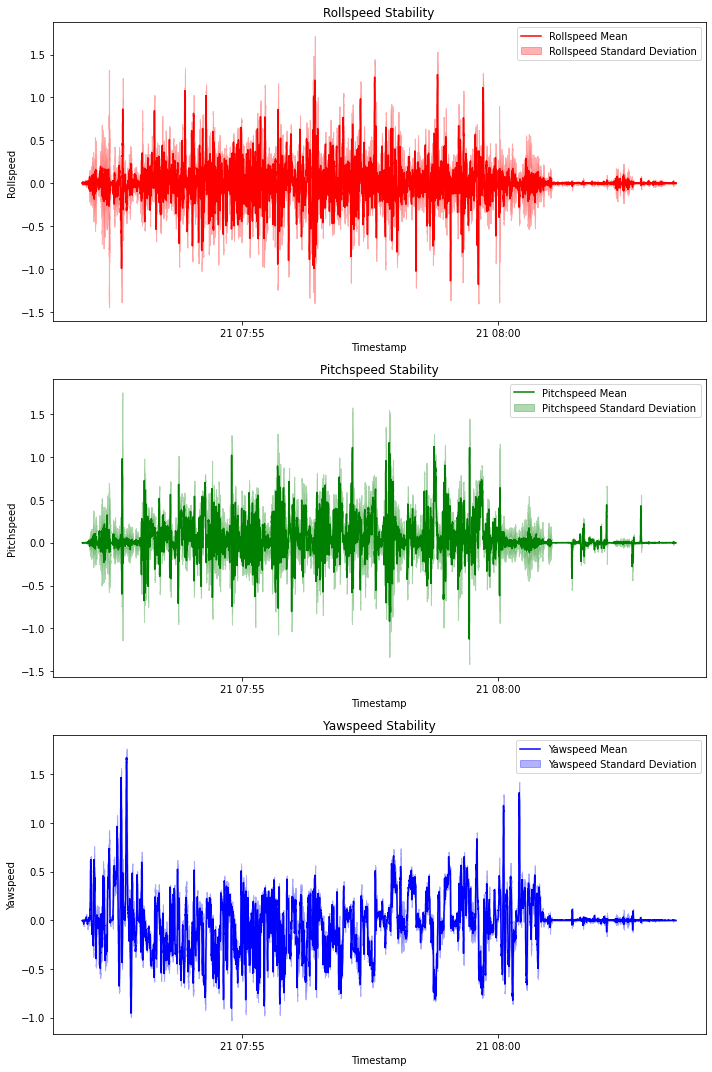

In [13]:
# Plot rolling mean and standard deviation for roll, pitch, and yaw
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

metrics = ['rollspeed', 'pitchspeed', 'yawspeed']
colors = ['r', 'g', 'b']

for i, ax in enumerate(axes.flat):
    metric = metrics[i]
    color = colors[i]

    ax.plot(data.index, data[f'{metric}_mean'], label=f'{metric.capitalize()} Mean', color=color)
    ax.fill_between(data.index,
                    data[f'{metric}_mean'] - data[f'{metric}_std'],
                    data[f'{metric}_mean'] + data[f'{metric}_std'],
                    alpha=0.3, color=color, label=f'{metric.capitalize()} Standard Deviation')

    ax.set_xlabel('Timestamp')
    ax.set_ylabel(f'{metric.capitalize()}')
    ax.set_title(f'{metric.capitalize()} Stability')
    ax.legend()

plt.tight_layout()
plt.show()
